**Calculating Fourier Power Spectrum of Protocols Generated for Arij in June 2022**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import Fourier_Power_Spectrum
import plotting_utilities
import warnings; warnings.simplefilter('ignore')

In June 2022, Lawson Fuller sent Professor Arij Daou some files of stimulating currents for HVC neurons. This stimulating current data is stored on KAM in the directory /volume1/homes/adaou/Chaotic Stimuli/stimuli_from_Lawson/ 

Let's see what the Fourier power spectrum of one of these currents is.

# Calculating FPS of a Single Stimulus

In [10]:
# Basic Plotting
save_and_or_display = "display"

neuron_directory = "making_stimulus_protocols/range=100pA/"
# neuron_directory = "./"

filename = "I_colpitts_x_time_dilation=6.0range=100_(I).txt"
# filename = "N2_volt.txt"

current_arr = np.loadtxt(neuron_directory + filename)

freq_units = "kHz" # frequency units
sampling_rate = 50.0 # kHz (1/ms)
delta_t = 1.0/sampling_rate  # this is milliseconds (1.0/50kHz= 0.02ms)
num_timesteps = current_arr.shape[0]
t_final = num_timesteps * delta_t  # measured in ms
t_arr = np.arange(start=0, stop= t_final, step= delta_t) # units: ms

# Calculate the FPS of I(t)
FPS_list, freq_array = Fourier_Power_Spectrum.calc_Fourier_power_spectrum([current_arr], t_arr)

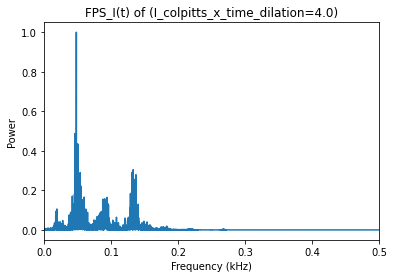

In [11]:
# Plot the FPS of I(t)
fig = plotting_utilities.plotting_quantity(freq_array[1:], FPS_list[0][1:]/np.max(FPS_list[0][1:]), 
                                     "FPS_I(t) of (I_colpitts_x_time_dilation=4.0)", 
                                     "Frequency (kHz)", "Power", "display", xlim=(0,0.5))

In [12]:
print((FPS_list))

[array([9.13738064e+12, 5.65427806e+09, 3.71232078e+09, ...,
       4.63029423e+02, 4.63029400e+02, 4.63029395e+02])]


This is completely consistent with the FPS chart created by running the code:
    make_stimuli.py
I have confidence in this Fourier_Power_Spectrum.calc_Fourier_power_spectrum() function, and their agreement makes me equally confident in both of them.

By testing on N2_stim and N2_twin, and based on Jason's ability to use data assimilation on those files, we can conclude that the profiles of the stimulus and the voltage don't have to line up in order for a data assimilation method to be successful. Does this apply to RBFs as well? I don't know yet. We could always test RBFs on this pair of data files as well.